# Q2 a)

In [102]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Preprocessing dataset

In [103]:
df = pd.read_csv("voice.csv")

features = df.drop(columns=["label"]).values
labels = df["label"].values 

label_map = {"male": 0, "female": 1} 

labels = [label_map[label] for label in labels]
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels, num_classes=2)
label = torch.tensor(labels, dtype=torch.float)

data = torch.tensor(features, dtype=torch.float)

# Class for a 1D convolutional neural network

In [104]:
class Conv1DNN(nn.Module):
    def __init__(self):
        super(Conv1DNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, 5, stride=1)
        self.fc1 = nn.Linear(512, 2)
        self.fc2 = nn.Linear(64, 2)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.dropout(x)
        x = torch.flatten(x)

        # print(x.shape)
        # x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc1(x))
        # print(x)
        return x

# Making a model from the neural network

In [105]:
model = Conv1DNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [106]:
arr_t_acc = []
arr_v_acc = []
arr_t_loss = []
arr_v_loss = []

# Training the neural network 

In [107]:
def train_conv(x, y, val_d, val_l, num_epochs=60):
    for epoch in range(num_epochs):
        model.train()
        total_correct = 0
        total_samples = 0
        t_loss = 0.0
        for j in range(len(x)):
            optimizer.zero_grad()

            outputs = model(x[j].unsqueeze(0))

            loss = criterion(outputs, y[j])
            loss.backward()
            optimizer.step()
            t_loss += loss.item()

            predicted = torch.round(outputs)

            total_correct += (predicted == y[j]).sum().item()
            total_samples += y[j].size(0)
        t_loss /= len(x)

        correct = 0
        total = 0
        v_loss = 0.0
        with torch.no_grad():
            for j in range(len(val_d)):
                outputs = model(val_d[j].unsqueeze(0))
                loss = criterion(outputs, y[j])
                v_loss += loss.item()
                predicted = torch.round(outputs)
                total += val_l[j].size(0)
                correct += (predicted == val_l[j]).sum().item()
        v_loss /= len(val_d)

        v_acc = 100 * correct / total

        t_acc = 100 * total_correct / total_samples
        arr_t_acc.append(t_acc)
        arr_v_acc.append(v_acc)
        arr_t_loss.append(t_loss)
        arr_v_loss.append(v_loss)
        print(f'Epoch {epoch+1}: Train Accuracy = {t_acc:.2f}%, Validation Accuracy = {v_acc:.2f}%, Train Loss: {t_loss:.4f}, validation Loss: {v_loss:.4f}')


In [108]:
# print(data.shape)
t_and_v_data, test_data, t_and_v_labels, test_labels = train_test_split(data, label, test_size=0.2)
train_data, val_data, train_labels, val_labels = train_test_split(t_and_v_data, t_and_v_labels, test_size=0.2)
train_conv(train_data, train_labels, val_data, val_labels)

Epoch 1: Train Accuracy = 53.97%, Validation Accuracy = 52.86%, Train Loss: 0.6831, validation Loss: 0.7206
Epoch 2: Train Accuracy = 54.32%, Validation Accuracy = 56.61%, Train Loss: 0.6727, validation Loss: 0.7317
Epoch 3: Train Accuracy = 55.38%, Validation Accuracy = 57.89%, Train Loss: 0.6702, validation Loss: 0.7548
Epoch 4: Train Accuracy = 56.88%, Validation Accuracy = 58.28%, Train Loss: 0.6612, validation Loss: 0.7444
Epoch 5: Train Accuracy = 60.31%, Validation Accuracy = 66.47%, Train Loss: 0.6440, validation Loss: 0.7693
Epoch 6: Train Accuracy = 66.55%, Validation Accuracy = 72.29%, Train Loss: 0.6058, validation Loss: 0.7936
Epoch 7: Train Accuracy = 69.07%, Validation Accuracy = 68.84%, Train Loss: 0.5877, validation Loss: 0.7630
Epoch 8: Train Accuracy = 68.15%, Validation Accuracy = 68.64%, Train Loss: 0.5821, validation Loss: 0.7621
Epoch 9: Train Accuracy = 71.68%, Validation Accuracy = 73.27%, Train Loss: 0.5609, validation Loss: 0.8173
Epoch 10: Train Accuracy = 7

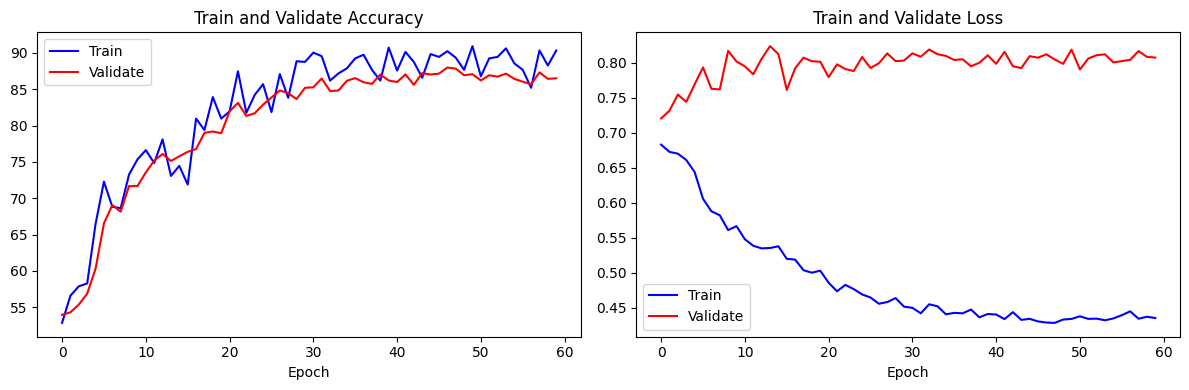

In [109]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(arr_v_acc, label='Train', color='blue')
plt.plot(arr_t_acc, label='Validate', color='red')
plt.title('Train and Validate Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(arr_t_loss, label='Train', color='blue')
plt.plot(arr_v_loss, label='Validate', color='red')
plt.title('Train and Validate Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Q2 b)